In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import re

In [2]:
file_dir='C://Users/Ian/Desktop/Misc_Projects/World_Cup_Analysis/Data'

matches = pd.read_csv(f'{file_dir}/import_matches_transformed.csv')
players = pd.read_csv(f'{file_dir}/WorldCupPlayers.csv')


pd.options.display.float_format = '{:.2f}'.format

In [3]:
matches.head(50)

,match_date,year,country,city,stadium,attendance,stage,home_name,home_init,away_name,away_init,home_score_45,away_score_45,home_score_final,away_score_final,winner,matchID,roundID
0,1930-07-13,1930,Uruguay,Montevideo,Pocitos,4444.00,Group 1,France,FRA,Mexico,MEX,3,0,4,1,France,1096,201
1,1930-07-13,1930,Uruguay,Montevideo,Parque Central,18346.00,Group 4,United States,USA,Belgium,BEL,2,0,3,0,United States,1090,201
2,1930-07-14,1930,Uruguay,Montevideo,Parque Central,24059.00,Group 2,Yugoslavia,YUG,Brazil,BRA,2,0,2,1,FR Yugoslavia,1093,201
3,1930-07-14,1930,Uruguay,Montevideo,Pocitos,2549.00,Group 3,Romania,ROU,Peru,PER,1,0,3,1,Romania,1098,201
4,1930-07-15,1930,Uruguay,Montevideo,Parque Central,23409.00,Group 1,Argentina,ARG,France,FRA,0,0,1,0,Argentina,1085,201
5,1930-07-16,1930,Uruguay,Montevideo,Parque Central,9249.00,Group 1,Chile,CHI,Mexico,MEX,1,0,3,0,Chile,1095,201
6,1930-07-17,1930,Uruguay,Montevideo,Parque Central,18306.00,Group 2,Yugoslavia,YUG,Bolivia,BOL,0,0,4,0,FR Yugoslavia,1092,201
7,1930-07-17,1930,Uruguay,Montevideo,Parque Central,18306.00,Group 4,United States,USA,Paraguay,PAR,2,0,3,0,United States,1097,201
8,1930-07-18,1930,Uruguay,Montevideo,Estadio Centenario,57735.00,Group 3,Uruguay,URU,Peru,PER,0,0,1,0,Uruguay,1099,201
9,1930-07-19,1930,Uruguay,Montevideo,Estadio Centenario,2000.00,Group 1,Chile,CHI,France,FRA,0,0,1,0,Chile,1094,201


# MORE TRANSFORMATIONS

### Add columns for goals in 1st/2nd half

In [4]:
# Change appropriate columns to 'home_score_half1'
matches = matches.rename(columns={'home_score_45':'home_score_half1','away_score_45':'away_score_half1'})

In [5]:
# Add a 'home_score_half2' column
matches['home_score_half2'] = matches['home_score_final'] - matches['home_score_half1']
matches['away_score_half2'] = matches['away_score_final'] - matches['away_score_half1']

In [6]:
cols = ['matchID', 'roundID', 'match_date', 'year', 'country', 'city', 'stadium', 'attendance',
       'stage', 'home_name', 'home_init', 'away_name', 'away_init',
       'home_score_half1', 'away_score_half1', 'home_score_half2', 'away_score_half2',
        'home_score_final', 'away_score_final', 'winner']

matches = matches[cols]

In [7]:
matches

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,home_init,away_name,away_init,home_score_half1,away_score_half1,home_score_half2,away_score_half2,home_score_final,away_score_final,winner
0,1096,201,1930-07-13,1930,Uruguay,Montevideo,Pocitos,4444.00,Group 1,France,FRA,Mexico,MEX,3,0,1,1,4,1,France
1,1090,201,1930-07-13,1930,Uruguay,Montevideo,Parque Central,18346.00,Group 4,United States,USA,Belgium,BEL,2,0,1,0,3,0,United States
2,1093,201,1930-07-14,1930,Uruguay,Montevideo,Parque Central,24059.00,Group 2,Yugoslavia,YUG,Brazil,BRA,2,0,0,1,2,1,FR Yugoslavia
3,1098,201,1930-07-14,1930,Uruguay,Montevideo,Pocitos,2549.00,Group 3,Romania,ROU,Peru,PER,1,0,2,1,3,1,Romania
4,1085,201,1930-07-15,1930,Uruguay,Montevideo,Parque Central,23409.00,Group 1,Argentina,ARG,France,FRA,0,0,1,0,1,0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,300186488,255953,2014-07-05,2014,Brazil,Salvador,Arena Fonte Nova,51179.00,Quarterfinals,Netherlands,NED,Costa Rica,CRC,0,0,0,0,0,0,Draw: Netherlands
848,300186474,255955,2014-07-08,2014,Brazil,Belo Horizonte,Estadio Mineirao,58141.00,Semifinals,Brazil,BRA,Germany,GER,0,5,1,2,1,7,Germany
849,300186490,255955,2014-07-09,2014,Brazil,São Paulo,Arena de Sao Paulo,63267.00,Semifinals,Netherlands,NED,Argentina,ARG,0,0,0,0,0,0,Draw: Netherlands
850,300186502,255957,2014-07-12,2014,Brazil,Brasília,Estadio Nacional,68034.00,Third place,Brazil,BRA,Netherlands,NED,0,2,0,1,0,3,Netherlands


In [8]:
# Add columns for 'winning score' and 'losing score'
def winner_halftime_score(row):
    if row['winner'] == row['home_name']:
        return row['home_score_half1']
    if row['winner'] == row['away_name']:
        return row['away_score_half1']
    
def winner_half2_score(row):
    if row['winner'] == row['home_name']:
        return row['home_score_final']-row['home_score_half1']
    if row['winner'] == row['away_name']:
        return row['away_score_final']-row['away_score_half1']
    
def winner_final_score(row):
    if row['winner'] == row['home_name']:
        return row['home_score_final']
    if row['winner'] == row['away_name']:
        return row['away_score_final']
    
def loser_halftime_score(row):
    if row['winner'] == row['home_name']:
        return row['away_score_half1']
    if row['winner'] == row['away_name']:
        return row['home_score_half1']
    
def loser_half2_score(row):
    if row['winner'] == row['home_name']:
        return row['away_score_final']-row['away_score_half1']
    if row['winner'] == row['away_name']:
        return row['home_score_final']-row['home_score_half1']
    
def loser_final_score(row):
    if row['winner'] == row['home_name']:
        return row['away_score_final']
    if row['winner'] == row['away_name']:
        return row['home_score_final']

In [9]:
matches['winning_score_half1'] = matches.apply(lambda row: winner_halftime_score(row), axis=1)
matches['losing_score_half1'] = matches.apply(lambda row: loser_halftime_score(row), axis=1)

matches['winning_score_half2'] = matches.apply(lambda row: winner_half2_score(row), axis=1)
matches['losing_score_half2'] = matches.apply(lambda row: loser_half2_score(row), axis=1)

matches['winning_score_final'] = matches.apply(lambda row: winner_final_score(row), axis=1)
matches['losing_score_final'] = matches.apply(lambda row: loser_final_score(row), axis=1)

### Fix Yugoslavia name inconsitincies

In [10]:
# Double check if there are any rows with null winning/losing scores where it was NOT a draw
matches.loc[(matches['winning_score_half1'].isnull()==True)&(matches['home_score_final']!=matches['away_score_final'])]

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_half2,home_score_final,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final
2,1093,201,1930-07-14,1930,Uruguay,Montevideo,Parque Central,24059.00,Group 2,Yugoslavia,...,1,2,1,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
6,1092,201,1930-07-17,1930,Uruguay,Montevideo,Parque Central,18306.00,Group 2,Yugoslavia,...,0,4,0,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
57,1230,208,1950-06-25,1950,Brazil,Belo Horizonte,Independencia,7336.00,Group 1,Yugoslavia,...,0,3,0,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
59,1225,208,1950-06-28,1950,Brazil,Porto Alegre,Eucaliptos,11078.00,Group 1,Yugoslavia,...,1,4,1,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
78,1276,211,1954-06-16,1954,Switzerland,Lausanne,La Pontaise,16000.00,Group 1,Yugoslavia,...,0,1,0,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
112,1388,220,1958-06-11,1958,Sweden,Västerås,Arosvallen,12217.00,Group 2,Yugoslavia,...,1,3,2,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
144,1564,231,1962-06-02,1962,Chile,Arica,Carlos Dittborn,8829.00,Group 1,Yugoslavia,...,0,3,1,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
156,1480,231,1962-06-07,1962,Chile,Arica,Carlos Dittborn,7167.00,Group 1,Yugoslavia,...,0,5,0,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
163,1511,232,1962-06-10,1962,Chile,Santiago,Nacional,63324.00,Quarterfinals,Yugoslavia,...,0,1,0,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN
243,2186,262,1974-06-18,1974,Germany,Gelsenkirchen,Parkstadion,31700.00,Group 2,Yugoslavia,...,0,9,0,FR Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Functions to change 'FR Yugoslavia' into format that works with winning/losing score functions
def change_yugoslavia_away(row):
    if (row['away_name'] == 'FR Yugoslavia'):
        return 'Yugoslavia'
    else:
        return row['away_name']

def change_yugoslavia_winner(row):
    if (row['winner'] == 'FR Yugoslavia'):
        return 'Yugoslavia'
    else:
        return row['winner']

In [12]:
# Apply the new functions to change 'FR Yugoslavia' into format that works with the new column functions
matches['away_name'] = matches.apply(lambda row: change_yugoslavia_away(row), axis=1)
matches['winner'] = matches.apply(lambda row: change_yugoslavia_winner(row), axis=1)
matches['winning_score_half1'] = matches.apply(lambda row: winner_halftime_score(row), axis=1)
matches['losing_score_half1'] = matches.apply(lambda row: loser_halftime_score(row), axis=1)
matches['winning_score_final'] = matches.apply(lambda row: winner_final_score(row), axis=1)
matches['losing_score_final'] = matches.apply(lambda row: loser_final_score(row), axis=1)

In [13]:
# Verify no more weird cases
matches.loc[(matches['winning_score_half1'].isnull()==True)&(matches['home_score_final']!=matches['away_score_final'])]

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_half2,home_score_final,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final


In [14]:
# Verify those matches have results now for winning/losing scores
matches.loc[matches['winner']=='Yugoslavia']

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_half2,home_score_final,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final
2,1093,201,1930-07-14,1930,Uruguay,Montevideo,Parque Central,24059.00,Group 2,Yugoslavia,...,1,2,1,Yugoslavia,2.00,0.00,NaN,NaN,2.00,1.00
6,1092,201,1930-07-17,1930,Uruguay,Montevideo,Parque Central,18306.00,Group 2,Yugoslavia,...,0,4,0,Yugoslavia,0.00,0.00,NaN,NaN,4.00,0.00
57,1230,208,1950-06-25,1950,Brazil,Belo Horizonte,Independencia,7336.00,Group 1,Yugoslavia,...,0,3,0,Yugoslavia,0.00,0.00,NaN,NaN,3.00,0.00
59,1225,208,1950-06-28,1950,Brazil,Porto Alegre,Eucaliptos,11078.00,Group 1,Yugoslavia,...,1,4,1,Yugoslavia,2.00,0.00,NaN,NaN,4.00,1.00
78,1276,211,1954-06-16,1954,Switzerland,Lausanne,La Pontaise,16000.00,Group 1,Yugoslavia,...,0,1,0,Yugoslavia,1.00,0.00,NaN,NaN,1.00,0.00
112,1388,220,1958-06-11,1958,Sweden,Västerås,Arosvallen,12217.00,Group 2,Yugoslavia,...,1,3,2,Yugoslavia,1.00,1.00,NaN,NaN,3.00,2.00
144,1564,231,1962-06-02,1962,Chile,Arica,Carlos Dittborn,8829.00,Group 1,Yugoslavia,...,0,3,1,Yugoslavia,2.00,1.00,NaN,NaN,3.00,1.00
156,1480,231,1962-06-07,1962,Chile,Arica,Carlos Dittborn,7167.00,Group 1,Yugoslavia,...,0,5,0,Yugoslavia,2.00,0.00,NaN,NaN,5.00,0.00
163,1511,232,1962-06-10,1962,Chile,Santiago,Nacional,63324.00,Quarterfinals,Yugoslavia,...,0,1,0,Yugoslavia,0.00,0.00,NaN,NaN,1.00,0.00
243,2186,262,1974-06-18,1974,Germany,Gelsenkirchen,Parkstadion,31700.00,Group 2,Yugoslavia,...,0,9,0,Yugoslavia,6.00,0.00,NaN,NaN,9.00,0.00


### Fix group stage and consolidate final two matchs (1st/2nd and 3rd/4th) into "final round" in 'stage' column

In [15]:
# Change stage results where it says 'group' something to just 'group'
stages = matches['stage']

stages.unique()

array(['Group 1', 'Group 4', 'Group 2', 'Group 3', 'Semifinals', 'Final',
       'Round of 16', 'Quarterfinals', 'Third place', 'Final Round',
       'Group B', 'Group A', 'Group 6', 'Group 5', 'Group D', 'Group C',
       'Group F', 'Group E', ' Group A', 'Group H', 'Group G'],
      dtype=object)

In [93]:
stages = stages.replace(r'Group \d','Groups',regex=True)
stages = stages.replace(r'Group [ABCDEFGH]','Groups',regex=True)
stages = stages.replace(r' Groups','Groups',regex=True)

stages = stages.replace(r'Final Round','Final',regex=True)
stages = stages.replace(r'Final','Final Round', regex=True)
stages = stages.replace(r'Third place','Final Round',regex=True)

stages.unique()

array(['Groups', 'Semifinals', 'Final Round', 'Round of 16',
       'Quarterfinals'], dtype=object)

In [94]:
matches['stage'] = stages

matches

,matchID,roundID,match_date,year,country,city,stadium,attendance,stage,home_name,...,away_score_half2,home_score_final,away_score_final,winner,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final
0,1096,201,1930-07-13,1930,Uruguay,Montevideo,Pocitos,4444.00,Groups,France,...,1,4,1,France,3.00,0.00,1.00,1.00,4.00,1.00
1,1090,201,1930-07-13,1930,Uruguay,Montevideo,Parque Central,18346.00,Groups,United States,...,0,3,0,United States,2.00,0.00,1.00,0.00,3.00,0.00
2,1093,201,1930-07-14,1930,Uruguay,Montevideo,Parque Central,24059.00,Groups,Yugoslavia,...,1,2,1,Yugoslavia,2.00,0.00,NaN,NaN,2.00,1.00
3,1098,201,1930-07-14,1930,Uruguay,Montevideo,Pocitos,2549.00,Groups,Romania,...,1,3,1,Romania,1.00,0.00,2.00,1.00,3.00,1.00
4,1085,201,1930-07-15,1930,Uruguay,Montevideo,Parque Central,23409.00,Groups,Argentina,...,0,1,0,Argentina,0.00,0.00,1.00,0.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,300186488,255953,2014-07-05,2014,Brazil,Salvador,Arena Fonte Nova,51179.00,Quarterfinals,Netherlands,...,0,0,0,Draw: Netherlands,NaN,NaN,NaN,NaN,NaN,NaN
848,300186474,255955,2014-07-08,2014,Brazil,Belo Horizonte,Estadio Mineirao,58141.00,Semifinals,Brazil,...,2,1,7,Germany,5.00,0.00,2.00,1.00,7.00,1.00
849,300186490,255955,2014-07-09,2014,Brazil,São Paulo,Arena de Sao Paulo,63267.00,Semifinals,Netherlands,...,0,0,0,Draw: Netherlands,NaN,NaN,NaN,NaN,NaN,NaN
850,300186502,255957,2014-07-12,2014,Brazil,Brasília,Estadio Nacional,68034.00,Final Round,Brazil,...,1,0,3,Netherlands,2.00,0.00,1.00,0.00,3.00,0.00


# Analysis

# Trends in scores from year-to-year?

In [18]:
# Group by year
yearly_groups = matches.groupby('year')

In [19]:
yearly_url = 'Analysis/Year-to-Year'

In [20]:
yearly_groups.mean()

,matchID,roundID,attendance,home_score_half1,away_score_half1,home_score_half2,away_score_half2,home_score_final,away_score_final,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final
year,,,,,,,,,,,,,,,
1930,1092.50,212.44,32808.28,1.50,0.28,1.78,0.33,3.28,0.61,1.50,0.28,1.75,0.31,3.28,0.61
1934,1120.71,1040.41,21352.94,1.18,0.53,1.65,0.76,2.82,1.29,1.25,0.56,1.69,0.75,2.94,1.31
1938,1162.00,997.33,20872.22,1.11,0.56,2.28,0.72,3.39,1.28,1.33,0.67,2.40,0.53,3.73,1.20
1950,1204.09,208.27,47511.18,1.50,0.36,1.64,0.50,3.14,0.86,1.47,0.21,1.76,0.47,3.32,0.68
1954,1270.08,482.27,29561.81,1.77,0.50,2.42,0.69,4.19,1.19,1.92,0.54,2.52,0.57,4.33,1.08
1958,1381.74,421.86,23423.14,0.97,0.57,1.54,0.51,2.51,1.09,1.20,0.44,1.83,0.42,3.04,0.88
1962,1490.91,451.91,27911.62,0.91,0.31,1.25,0.31,2.16,0.62,0.96,0.33,1.42,0.29,2.41,0.59
1966,1636.97,459.28,48847.97,0.91,0.34,1.25,0.28,2.16,0.62,1.07,0.37,1.41,0.30,2.48,0.67
1970,1827.47,471.72,50124.22,0.66,0.34,1.59,0.38,2.25,0.72,0.74,0.41,1.85,0.37,2.59,0.78


In [21]:
winning_means_by_cup = yearly_groups['winning_score_final'].mean()
losing_means_by_cup = yearly_groups['losing_score_final'].mean()

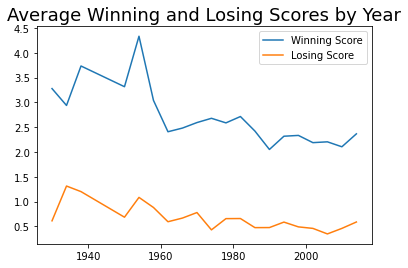

In [119]:
# Plot the winning and losing average scores for each world cup
plt.plot(winning_means_by_cup)
plt.plot(losing_means_by_cup)
plt.legend(['Winning Score','Losing Score'])
plt.title('Average Winning and Losing Scores by Year', fontsize=18)

plt.savefig(f'{yearly_url}/Average_Scores_by_Year')

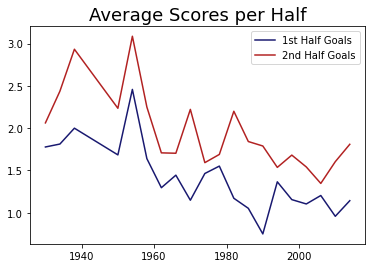

In [120]:
plt.plot(yearly_groups['winning_score_half1'].mean()+yearly_groups['losing_score_half1'].mean(), color='midnightblue')
plt.plot(yearly_groups['winning_score_half2'].mean()+yearly_groups['losing_score_half2'].mean(), color='firebrick')

plt.legend(['1st Half Goals','2nd Half Goals'])
plt.title('Average Scores per Half', fontsize=18)

plt.savefig(f'{yearly_url}/Average_Scores_per_Half')

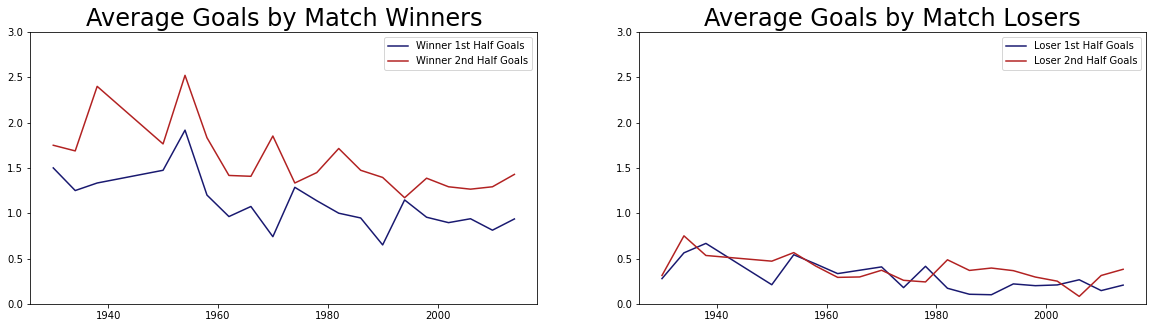

In [78]:
fig, axes = plt.subplots(1,2,figsize=(20,5))

axes[0].plot(yearly_groups['winning_score_half1'].mean(), color='midnightblue')
axes[0].plot(yearly_groups['winning_score_half2'].mean(), color='firebrick')

axes[0].set_title('Average Goals by Match Winners',fontsize=24)
axes[0].legend(['Winner 1st Half Goals','Winner 2nd Half Goals'])
axes[0].set_yticks(np.arange(0,3.5,step=0.5))


axes[1].plot(yearly_groups['losing_score_half1'].mean(), color='midnightblue')
axes[1].plot(yearly_groups['losing_score_half2'].mean(), color='firebrick')

axes[1].set_title('Average Goals by Match Losers',fontsize=24)
axes[1].legend(['Loser 1st Half Goals','Loser 2nd Half Goals'])
axes[1].set_yticks(np.arange(0,3.5,step=0.5))

plt.savefig(f'{yearly_url}/Average_Goals_by_Half_(WinLoss)')

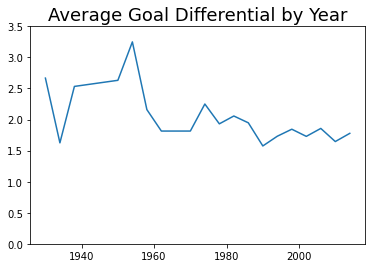

In [121]:
# Determine average goal differential for each year
plt.plot(winning_means_by_cup-losing_means_by_cup)
plt.yticks(np.arange(0,4,step=0.5))

plt.title('Average Goal Differential by Year', fontsize=18)

plt.savefig(f'{yearly_url}/Average_Goal_Differential')

## Any trends in different stages per Year?

In [111]:
stages_df = matches.copy()

In [112]:
def stage_value(row):
    if row['stage'] == 'Groups':
        return 1
    if row['stage'] == 'Round of 16':
        return 2
    if row['stage'] == 'Quarterfinals':
        return 3
    if row['stage'] == 'Semifinals':
        return 4
    if row['stage'] == 'Final Round':
        return 5

In [113]:
stages_df['stage_value'] = matches.apply(lambda row: stage_value(row), axis=1)

In [114]:
stage_groups = stages_df.groupby('stage')

In [115]:
stage_means = stage_groups.mean().sort_values('stage_value')

stage_means

,matchID,roundID,year,attendance,home_score_half1,away_score_half1,home_score_half2,away_score_half2,home_score_final,away_score_final,winning_score_half1,losing_score_half1,winning_score_half2,losing_score_half2,winning_score_final,losing_score_final,stage_value
stage,,,,,,,,,,,,,,,,,
Groups,57789602.74,11054726.14,1986.21,42584.90,0.72,0.42,1.01,0.54,1.73,0.96,1.07,0.23,1.44,0.27,2.52,0.51,1.00
Round of 16,93646355.67,12775231.35,1989.06,45337.49,0.61,0.29,1.35,0.78,1.96,1.07,0.83,0.21,1.62,0.52,2.45,0.73,2.00
Quarterfinals,63140458.73,8613801.44,1979.64,45697.48,0.68,0.36,1.11,0.58,1.79,0.94,0.94,0.38,1.45,0.39,2.38,0.77,3.00
Semifinals,57880209.67,7896883.11,1978.22,59053.33,0.56,0.61,1.56,0.92,2.11,1.53,1.13,0.27,1.97,0.60,3.10,0.87,4.00
Final Round,46303386.47,6318325.91,1975.33,68254.80,0.91,0.76,1.51,0.69,2.42,1.44,1.19,0.52,1.74,0.55,2.93,1.07,5.00


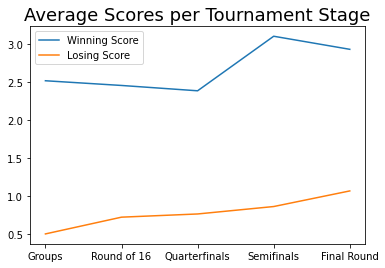

In [122]:
plt.plot(stage_means['winning_score_final'])
plt.plot(stage_means['losing_score_final'])

plt.title('Average Scores per Tournament Stage', fontsize=18)
plt.legend(['Winning Score','Losing Score'])

plt.savefig(f'{yearly_url}/Average_Scores_by_Stage')

# Best performances by host country? (furthest stage AND average furthest stage?)

In [23]:
# Group by country+cities

In [24]:
# Attendance groups+graph

In [25]:
# Most appearances for team?
# Most group advances?

In [26]:
# Most common matchups?

In [27]:
# Who has USA played the most?

In [28]:
# Most goals? Most avg goals?

# Most halftime comebacks?

In [29]:
# Find teams who won after being down at halftime
comeback_wins = matches.loc[matches['winning_score_half1']<matches['losing_score_half1']]

comeback_teams = comeback_wins.groupby('winner')['matchID'].count()
comeback_teams = comeback_teams.sort_values(ascending=False)

In [30]:
comeback_url = 'Analysis/Comebacks'

In [31]:
comeback_teams.count()

comeback_teams.index

comeback_teams_colors = ['yellow', 'red', 'cyan', 'orange', 'black',
       'red', 'orange', 'red', 'green', 'red',
       'green', 'firebrick', 'midnightblue', 'y', 'red', 'darkred',
       'forestgreen', 'black', 'midnightblue', 'blue', 'black', 'red']

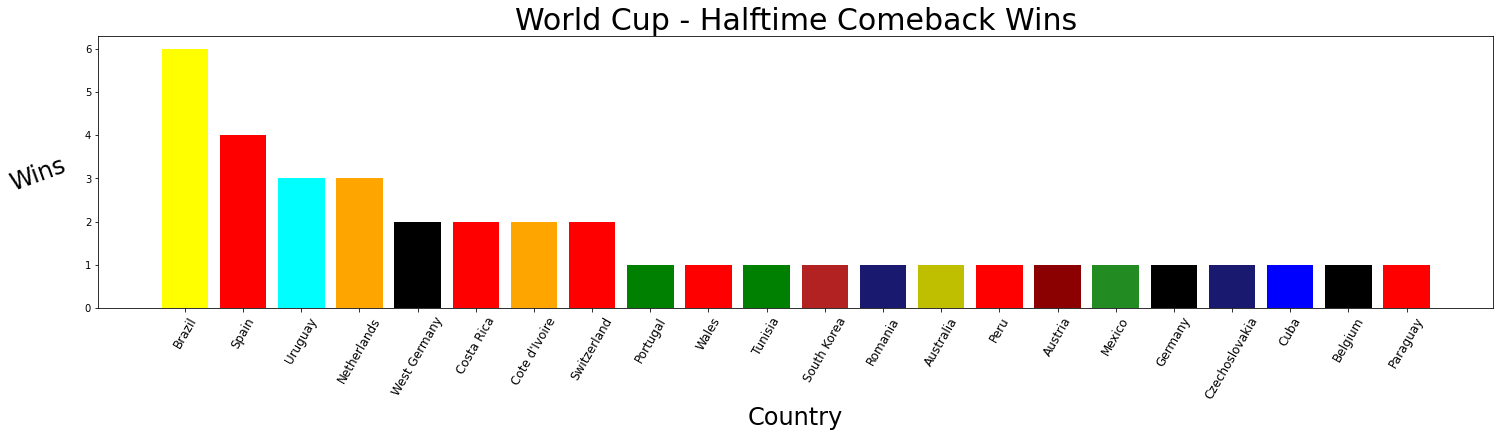

In [32]:
fig,ax = plt.subplots(figsize=(25,5))
ax.bar(comeback_teams.index,comeback_teams, color=comeback_teams_colors)

ax.set_title('World Cup - Halftime Comeback Wins', fontsize=30)
ax.set_xticks(np.arange(0,22,step=1))
ax.set_xticklabels(labels=comeback_teams.index,rotation=60, fontsize=12)
ax.set_xlabel('Country', fontsize=24)
ax.set_yticks(ticks=np.arange(0,7,step=1),fontsize=12)
ax.set_ylabel('Wins', rotation=20, fontsize=24)
ax.yaxis.set_label_coords(-0.04,.45)

plt.savefig(f'{comeback_url}/Comeback_Wins_by_Country')

In [33]:
comebacks_by_year = comeback_wins.groupby('year')['matchID'].count()

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


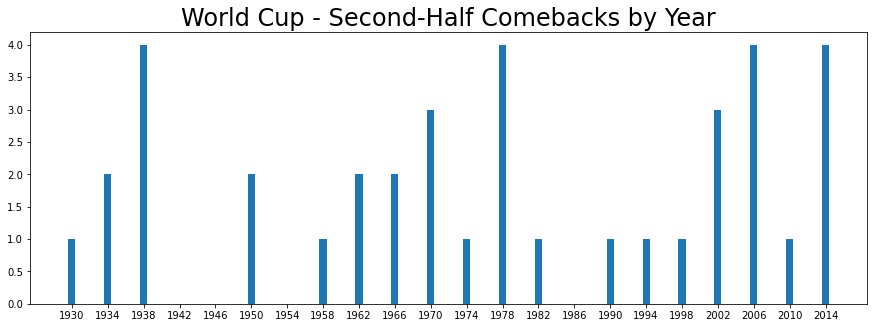

In [34]:
fig, ax = plt.subplots(figsize=(15,5))

ax.bar(comebacks_by_year.index, comebacks_by_year)
# Specify from 1930-2018 so it also shows years with no second-half comebacks
ax.set_xticks(np.arange(1930,2018, step=4))
ax.set_title('World Cup - Second-Half Comebacks by Year', fontsize=24)

plt.savefig(f'{comeback_url}/Comeback_Wins_by_Year')

fig.show()

In [35]:
comebacks_by_host_country = comeback_wins.groupby('country')['matchID'].count()
comebacks_by_host_country = comebacks_by_host_country.sort_values(ascending=False)

In [36]:
comebacks_by_host_country_colors = ['yellow', 'mediumblue', 'k', 
                                     'skyblue', 'limegreen', 'g', 
                                     'firebrick', 'b', 'red', 
                                     'g', 'r', 'y',
                                     'b', 'c']

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


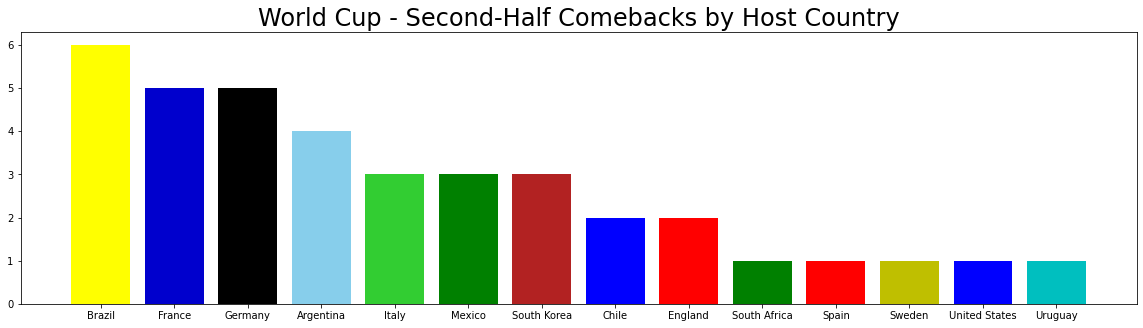

In [37]:
fig, ax = plt.subplots(figsize=(20,5))

ax.bar(comebacks_by_host_country.index, comebacks_by_host_country, color=comebacks_by_host_country_colors)
ax.set_title('World Cup - Second-Half Comebacks by Host Country', fontsize=24)

plt.savefig(f'{comeback_url}/Comeback_Wins_by_Host')

fig.show()

In [38]:
comeback_wins['score_diff_half'] = comeback_wins['losing_score_half1'] - comeback_wins['winning_score_half1']
comeback_wins['score_diff_final'] = comeback_wins['winning_score_final'] - comeback_wins['losing_score_final']
comeback_wins['winning_score_half2'] = comeback_wins['winning_score_final'] - comeback_wins['winning_score_half1']
comeback_wins['losing_score_half2'] = comeback_wins['losing_score_final'] - comeback_wins['losing_score_half1']

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [39]:
losing_score_half2_group = comeback_wins.groupby('losing_score_half2')['matchID'].count()
losing_score_half1_group = comeback_wins.groupby('losing_score_half1')['matchID'].count()

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


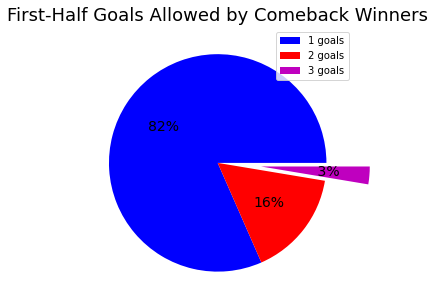

In [40]:
fig,ax = plt.subplots(figsize=(20,5))

labels = losing_score_half1_group.index
labels_adj = []

for i in range(len(labels)):
    labels_adj.append(int(labels[i]))
    labels_adj[i] = f'{labels_adj[i]} goals'
    
ax.set_title('First-Half Goals Allowed by Comeback Winners', fontsize=18)
ax.pie(losing_score_half1_group, autopct='%2.0f%%', 
       colors=['b','r','m'], explode=[0,0,0.4],
      textprops={'fontsize': 14})
ax.legend(labels_adj)

plt.savefig(f'{comeback_url}/Comeback_Goals_Allowed_Half1')

fig.show()

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


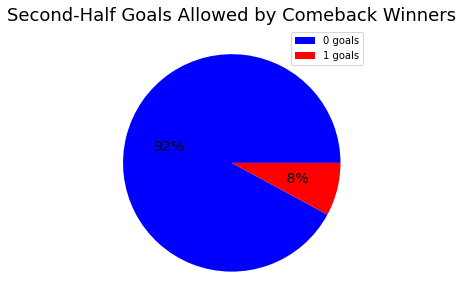

In [41]:
fig,ax = plt.subplots(figsize=(20,5))

labels = losing_score_half2_group.index
labels_adj = []

for i in range(len(labels)):
    labels_adj.append(int(labels[i]))
    labels_adj[i] = f'{labels_adj[i]} goals'
    
ax.set_title('Second-Half Goals Allowed by Comeback Winners', fontsize=18)
ax.pie(losing_score_half2_group, autopct='%2.0f%%', colors=['b','r'],
      textprops={'fontsize': 14})
ax.legend(labels_adj)

plt.savefig(f'{comeback_url}/Comeback_Goals_Allowed_Half2')

fig.show()

In [42]:
comeback_stages = comeback_wins.groupby('stage')['matchID'].count().sort_values(ascending=False)

C:\Users\Ian\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


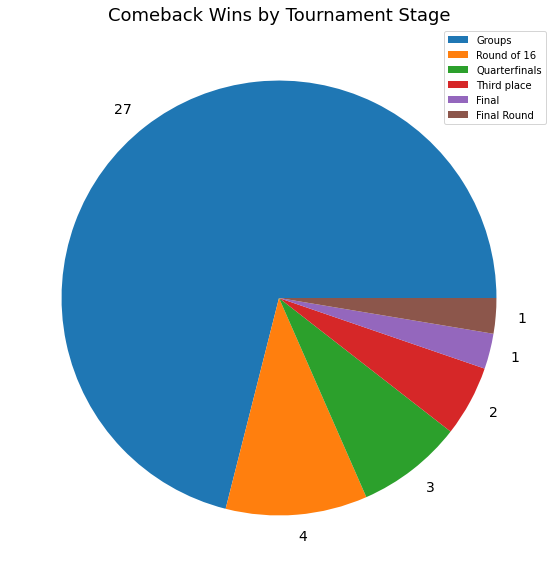

In [43]:
fig,ax = plt.subplots(figsize=(10,10))

labels = comeback_stages.index

    
ax.set_title('Comeback Wins by Tournament Stage', fontsize=18)
ax.pie(comeback_stages, labels=comeback_stages,
      textprops={'fontsize': 14})
ax.legend(labels)

plt.savefig(f'{comeback_url}/Comeback_Wins_by_Stage')

fig.show()